In [91]:
%%capture cell_1
"Hello! Tell me a joke about pandas"

In [92]:
from openai import OpenAI 
def get_response(prompt):
    client = OpenAI()
    response = client.chat.completions.create(model="gpt-3.5-turbo",
                                              messages=[{"role": "system", "content":"You are a helpful assistant"},
                                                        {"role": "user", "content": prompt}])
    return response.choices[0].message.content


get_response(cell_1.outputs[0].data["text/plain"])

"Sure! Here's a panda joke for you:\n\nWhy don't pandas like talking to strangers at parties?\n\nBecause they find it hard to break the ice, they're always eating bamboo!"

In [6]:
# !pip3 install openai-whisper

In [13]:
import whisper
from pydub import AudioSegment
import os



def transcribe_audio_file(audio_file):
    if audio_file.endswith(".m4a"):
        mp3_file = convert_m4a_to_mp3(audio_file)
        os.remove(audio_file)
        audio_file = mp3_file
    if calculate_memory_size_MB(audio_file) > 25:
        chunks = split_large_audio_file(audio_file, 5)
        transcriptions = [model.transcribe(chunk)["text"] for chunk in chunks]
        transcription = " ".join(transcriptions)
    else:
        transcription = model.transcribe(audio_file)["text"]

    return transcription


def store_segments(segments):
    texts = [segment['text'] for segment in segments]
    return texts, _


def calculate_memory_size_MB(file_path):
    audio_file = AudioSegment.from_mp3(file_path)
    memory_size_bytes = len(audio_file) * audio_file.channels * audio_file.sample_width
    return memory_size_bytes / 1_000_000


def split_large_audio_file(audio_file_path, duration_minutes):
    audio = AudioSegment.from_mp3(audio_file_path)
    split_chunk_time = duration_minutes * 60 * 1000
    chunks = [audio[i:i + split_chunk_time] for i in range(0, len(audio), split_chunk_time)]
    return chunks

def convert_m4a_to_mp3(m4a_file_path):
    audio = AudioSegment.from_file(m4a_file_path, "m4a")
    mp3_file_path = m4a_file_path.replace(".m4a", ".mp3")
    audio.export(mp3_file_path, format="mp3")
    return mp3_file_path

In [16]:
model = whisper.load_model("base")

In [93]:
%%capture cell_2
print("Transcription model loaded!")
transcription_file = "transcription.txt"
audio_file = "./output.mp3"
transcription = transcribe_audio_file(audio_file)
# with open(transcription_file, "w+") as f:
#     f.write(transcription)
transcription

In [94]:
input_transcription = cell_2.outputs[0].data["text/plain"]
target_language = "Italian"
prompt = f"Translate this {input_transcription} to {target_language}."
get_response(prompt)

'Ciao, sono Indymus Lucas e sto testando questa trascrizione di un file audio.'

In [201]:
%%capture data_input
import numpy as np
list(np.arange(0,100,1)**3)


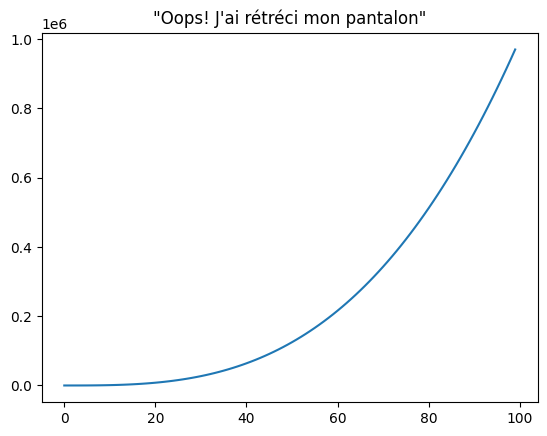

In [200]:
import matplotlib.pyplot as plt
from ast import literal_eval

plot_title_original = plot_title.outputs[0].data["text/plain"]
plot_title_translated = get_response(f"Translate this\
title {plot_title_original} to french and return only the title nothing else. Title translated:") 

plt.plot(literal_eval(data_input.outputs[0].data["text/plain"]))
plt.title(plot_title_translated)
plt.show()

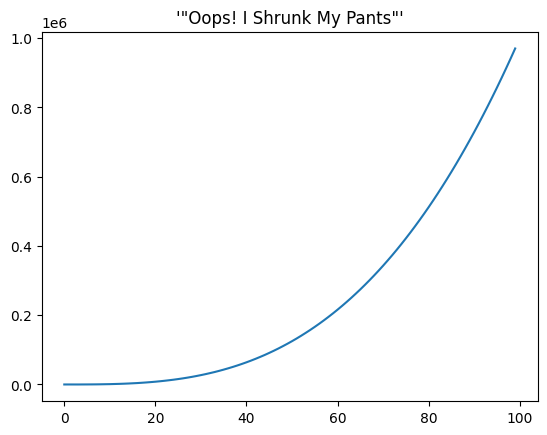

In [202]:
data = literal_eval(data_input.outputs[0].data["text/plain"])
data = np.array(data)

plot_title_original = plot_title.outputs[0].data["text/plain"]
plt.plot(data+np.random.normal(0,20,len(data)))
plt.title(plot_title_original)
plt.show()

In [203]:
%%capture plot_title

title_funny = get_response("Generate a funny title name and return just that name. Funny title:")

title_funny

array([-1.18350385, -0.56474148,  0.14628463,  1.22980886, -0.91506682,
        0.19054432,  0.77116061,  0.22281699, -1.59216514,  0.98719447])